In [1]:
import numpy as np
normal = np.random.multivariate_normal

In [6]:
import matplotlib.pyplot as plt

Creation of a dataset. Two 2D gaussian distributions.

In [20]:
sample1 = normal([0.,0.], [[1., 0.], [0.,1.]], 100)
sample2 = normal([2.,2.], [[1., 0.], [0.,1.]], 100)
target1 = np.zeros((100,))
target2 = np.ones((100,))

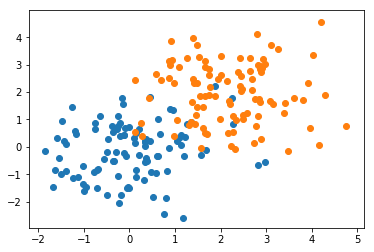

In [18]:
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
x = np.concatenate((sample1, sample2))
y = np.concatenate((target1, target2))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x, y)

In [42]:
clf.predict_proba([[4,4]])

array([[2.26242570e-05, 9.99977376e-01]])

In [81]:
xmin, xmax, npoints = -3, 6, 100
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))

In [82]:
grid = np.c_[gridx.ravel(), gridy.ravel()]

In [83]:
prob = clf.predict_proba(grid)

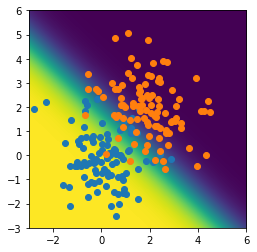

In [84]:
plt.imshow(prob[:,0].reshape(npoints,npoints), interpolation='bilinear', origin='lower', extent=[xmin,xmax,xmin,xmax])
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])